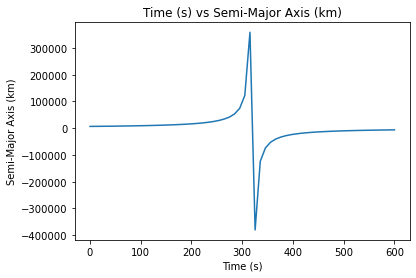

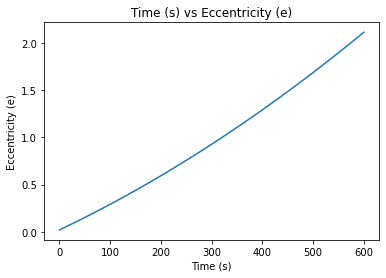

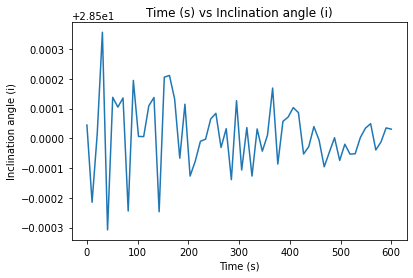

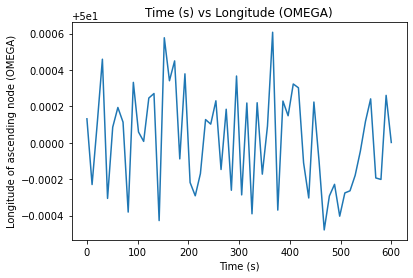

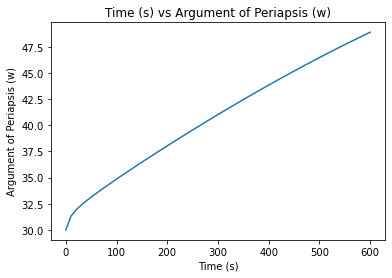

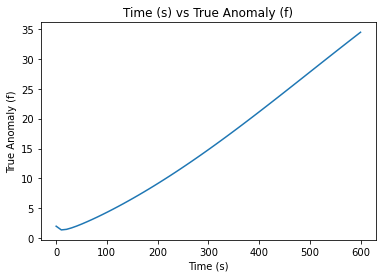

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import math as m

#Problem 2

#Contains position and velocity data as a function of time for a spacecraft in orbit around the Earth
orbitdata = pd.read_csv('trv.csv') #how we read the file (from hw 1)
 
time = orbitdata['t (s)'].values 
radx = orbitdata['   rx (km)'].values
rady = orbitdata['  ry (km)'].values
radz = orbitdata['  rz (km)'].values
velx = orbitdata[' vx (km/s)'].values
vely = orbitdata[' vy (km/s)'].values
velz = orbitdata[' vz (km/s)'].values

#we have r,v, convert to COE

muE = 3.986*10**5 #km^3/s^2

avals = []
evals = []
ivals = []
OMEGAvals = []
wvals = []
fvals = []
    

for j in range(0,60):
    rvec = np.array([radx[j],rady[j],radz[j]])
    vvec = np.array([velx[j],vely[j],velz[j]])

    def rv_COE(rvec,vvec):
        hvec = np.cross(rvec,vvec) #cross product func

        kvec = np.array([0,0,1])
        nvec = np.cross(kvec,hvec) #n cross k func
        nmag = np.linalg.norm(nvec)

        vmag = np.linalg.norm(vvec) #magnitude of vvec
        rmag = np.linalg.norm(rvec) #magnitude of rvec

        evec = 1/muE * ((vmag**2 - muE/rmag)*rvec - (rvec@vvec)*vvec)
        emag = np.linalg.norm(evec)

        P = (np.linalg.norm(hvec)**2)/muE
        a = P/(1-emag**2)

    ## take h,n,e vectors and find OMEGA, w, i
        h_k = np.linalg.norm(kvec@hvec)
        hmag = np.linalg.norm(hvec)
        i = m.acos(h_k/hmag)* 180/m.pi

        I = [1,0,0] #i direction

        if nvec[1]>0:
            OMEGA = m.acos(nvec[0]/nmag)* 180/m.pi 
        else:
            OMEGA = 360 - m.acos(nvec[0]/nmag)* 180/m.pi

        ndot = np.dot(nvec,evec)
        emag = np.linalg.norm(evec)

        if evec[2]>0:
            w = m.acos(ndot/(nmag*emag))* 180/m.pi
        else: 
            w = 360 - m.acos(ndot/(nmag*emag))* 180/m.pi

        e_f = evec@rvec
        if np.dot(rvec,vvec) > 0:
            f = m.acos(e_f/(emag*np.linalg.norm(rvec)))* 180/m.pi
        else:
            f = 360 - m.acos(e_f/(emag*np.linalg.norm(rvec)))* 180/m.pi
        return a,emag,i,OMEGA,w,f
    
#a,e,i,OMEGA,w,f
    avals.append(rv_COE(rvec,vvec)[0])
    evals.append(rv_COE(rvec,vvec)[1])
    ivals.append(rv_COE(rvec,vvec)[2])
    OMEGAvals.append(rv_COE(rvec,vvec)[3])
    wvals.append(rv_COE(rvec,vvec)[4])
    fvals.append(rv_COE(rvec,vvec)[5])
    
plt.plot(time,avals)
plt.xlabel("Time (s)")
plt.ylabel('Semi-Major Axis (km)')
plt.title('Time (s) vs Semi-Major Axis (km)')
plt.show()
    
plt.plot(time,evals)
plt.xlabel("Time (s)")
plt.ylabel('Eccentricity (e)')
plt.title('Time (s) vs Eccentricity (e)')
plt.show()
    
plt.plot(time,ivals)
plt.xlabel("Time (s)")
plt.ylabel('Inclination angle (i)')
plt.title('Time (s) vs Inclination angle (i)')
plt.show()
    
plt.plot(time,OMEGAvals)
plt.xlabel("Time (s)")
plt.ylabel('Longitude of ascending node (OMEGA)')
plt.title('Time (s) vs Longitude (OMEGA)')
plt.show()
    
plt.plot(time,wvals)
plt.xlabel("Time (s)")
plt.ylabel('Argument of Periapsis (w)')
plt.title('Time (s) vs Argument of Periapsis (w)')
plt.show()
    
plt.plot(time,fvals)
plt.xlabel("Time (s)")
plt.ylabel('True Anomaly (f)')
plt.title('Time (s) vs True Anomaly (f)')
plt.show()


In [3]:
2*2

4